In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/general_data.csv')

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

None

In [4]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


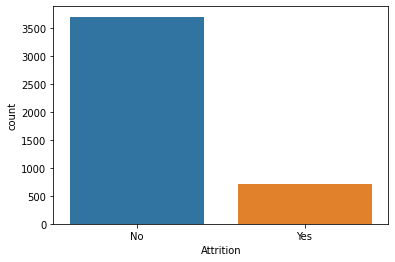

In [5]:
sns.countplot(df.Attrition)
plt.show()

In [6]:
for i in df:
    unique_val = df[i].nunique()
    if unique_val == 1:
        print(i, 'number of unique value :', unique_val)

# below items are unnecessary colomns, we have to drop

EmployeeCount number of unique value : 1
Over18 number of unique value : 1
StandardHours number of unique value : 1


In [7]:
# drop unnecessary colomns

unnecessary_colomns = ['EmployeeID', 'EmployeeCount', 'StandardHours' , 'Over18']
df.drop(unnecessary_colomns, axis =1, inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


### Converted Columns with object type

In [9]:
# find columns with object value

columns_object = []
for i in df :
    if (df[i]).dtype == 'O':
        columns_object.append(i)
        print(i, '__ need to be converted')

Attrition __ need to be converted
BusinessTravel __ need to be converted
Department __ need to be converted
EducationField __ need to be converted
Gender __ need to be converted
JobRole __ need to be converted
MaritalStatus __ need to be converted


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

att_converted = label_encoder.fit_transform(df[columns_object[0]])
print(label_encoder.classes_)
print(att_converted)

print('---------')
buss_converted = label_encoder.fit_transform(df[columns_object[1]])
print(label_encoder.classes_)
print(buss_converted)

print('---------')
dep_converted = label_encoder.fit_transform(df[columns_object[2]])
print(label_encoder.classes_)
print(dep_converted)

print('---------')

edu_converted = label_encoder.fit_transform(df[columns_object[3]])
print(label_encoder.classes_)
print(edu_converted)

print('---------')

gender_converted = label_encoder.fit_transform(df[columns_object[4]])
print(label_encoder.classes_)
print(gender_converted)


print('---------')

job_converted = label_encoder.fit_transform(df[columns_object[5]])
print(label_encoder.classes_)
print(job_converted)

print('---------')

marital_converted = label_encoder.fit_transform(df[columns_object[6]])
print(label_encoder.classes_)
print(marital_converted)

['No' 'Yes']
[0 1 0 ... 0 0 0]
---------
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[2 1 1 ... 2 2 2]
---------
['Human Resources' 'Research & Development' 'Sales']
[2 1 1 ... 1 2 1]
---------
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[1 1 4 ... 1 3 3]
---------
['Female' 'Male']
[0 0 1 ... 1 1 1]
---------
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
[0 6 7 ... 7 2 2]
---------
['Divorced' 'Married' 'Single']
[1 2 1 ... 1 0 0]


In [11]:
df_converted = df.copy()

In [12]:
columns_object

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [13]:
df_converted.Attrition = att_converted
df_converted.BusinessTravel = buss_converted
df_converted.Department = dep_converted
df_converted.EducationField = edu_converted
df_converted.Gender = gender_converted
df_converted.JobRole = job_converted
df_converted.MaritalStatus = marital_converted

In [14]:
df_converted.info()

# Now all feature is numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   Gender                   4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int64  
 10  MaritalStatus            4410 non-null   int64  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

### Fill missing value

In [15]:
df_converted.columns[np.where(df_converted.isnull().sum() > 0)]

# this 2 columns have missing values

Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object')

In [16]:
df_converted[['NumCompaniesWorked', 'TotalWorkingYears']].describe()

,NumCompaniesWorked,TotalWorkingYears
count,4391.000000,4401.000000
mean,2.694830,11.279936
std,2.498887,7.782222
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,10.000000
75%,4.000000,15.000000
max,9.000000,40.000000


In [17]:
display(df_converted.NumCompaniesWorked.mode())
display(df_converted.TotalWorkingYears.mode())

0    1.0
dtype: float64

0    10.0
dtype: float64

In [18]:
# fill with mode values

df_converted.NumCompaniesWorked.fillna(df_converted.NumCompaniesWorked.mode()[0], inplace=True)
df_converted.TotalWorkingYears.fillna(df_converted.TotalWorkingYears.mode()[0], inplace=True)

In [19]:
# Recheck, now all column is totally filled
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   Gender                   4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int64  
 10  MaritalStatus            4410 non-null   int64  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

## Build random forest to find which IDV that has effect the most

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
X = df_converted.drop('Attrition', axis = 1)
y = df_converted['Attrition']

In [22]:
rfc = RandomForestClassifier(n_estimators=1000, oob_score=True)

In [23]:
rfc.fit(X, y)
rfc.oob_score_

0.9997732426303855

In [24]:
ft_importances = rfc.feature_importances_
ft_importances

array([0.10152012, 0.02758289, 0.02565356, 0.07100038, 0.03791985,
       0.03987908, 0.01565266, 0.03459055, 0.05551496, 0.03952165,
       0.10839436, 0.05656483, 0.06624303, 0.03248006, 0.08663829,
       0.04396304, 0.06490043, 0.04214096, 0.04983932])

In [25]:
rfc_ft_df = pd.DataFrame(data= ft_importances, index= X.columns, 
                         columns=['Value']).sort_values('Value', ascending = False)
rfc_ft_df

,Value
MonthlyIncome,0.108394
Age,0.101520
TotalWorkingYears,0.086638
DistanceFromHome,0.071000
PercentSalaryHike,0.066243
YearsAtCompany,0.064900
NumCompaniesWorked,0.056565
JobRole,0.055515
YearsWithCurrManager,0.049839
TrainingTimesLastYear,0.043963


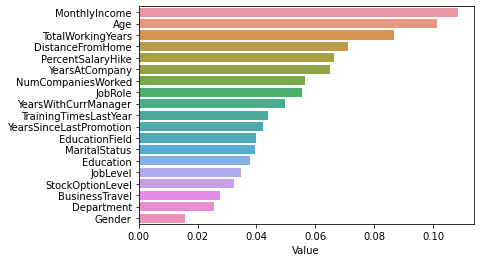

In [26]:
sns.barplot(x=rfc_ft_df.Value, y = rfc_ft_df.index )
plt.show()

we can see, top 4 features are Monthly Income, Age, Total working years and Distance from Home

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [28]:
X_importance = df_converted[['MonthlyIncome', 'Age', 'TotalWorkingYears',
                             'DistanceFromHome']]

In [29]:
dtc = DecisionTreeClassifier(max_depth=20, max_features=4, max_leaf_nodes= 15)
dtc

DecisionTreeClassifier(max_depth=20, max_features=4, max_leaf_nodes=15)

In [30]:
dtc.fit(X_importance, y)
dtc.score(X_importance, y)

0.8643990929705215

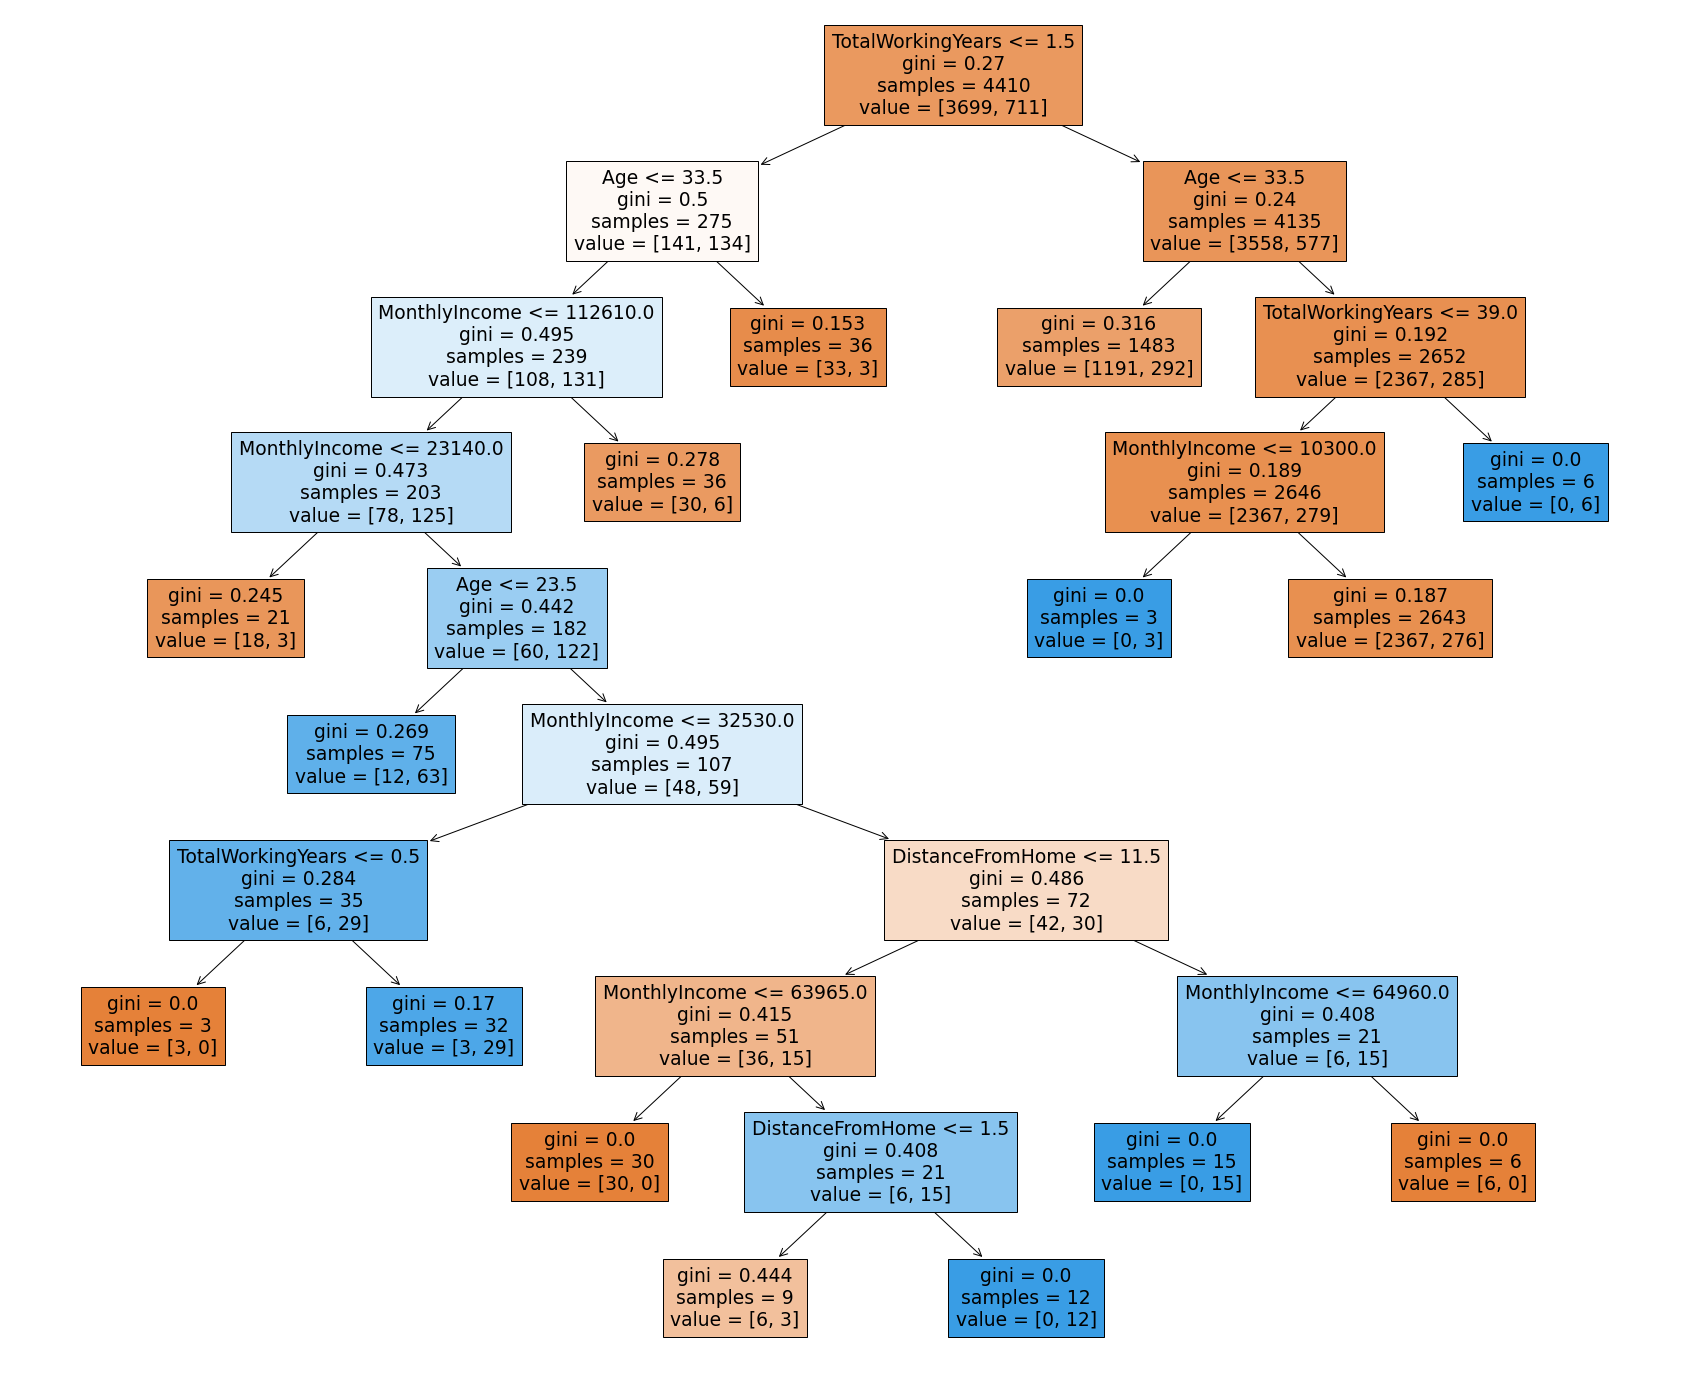

In [31]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(dtc, 
                   feature_names=X_importance.columns,
                   filled=True)

In [32]:
fig.savefig("decistion_tree_AttritionEmp.png")

### Rule for Decision Tree Attrition Project

- If total working years > 39 and Age > 33.5, attrition (1)
- If total working years <= 39 and Age > 33.5 and MonthlyIncome > 10300, attrition (0)
- If total working years <= 39 and Age > 33.5 and MonthlyIncome <= 10300, attrition (1)
- If total working years > 1.5 and Age <= 33.5, attrition (0)
- If total working years <= 1.5 and Age > 33.5, attrition (0)
- If total working years > 1.5 and Age <= 33.5 and Monthlyincome > 112610, attrition (0)
- If total working years > 1.5 and Age <= 33.5  and monthlyincome <= 23140, attrition (0)
- If total working years > 1.5  and monthlyincome > 23140 and Age <= 23.5, attrition (1)
- If total working years > 0.5  and Monthlyincome <=  32530 and  Age > 23.5, attrition (1)
- If total working years <= 0.5  and Monthlyincome <=  32530 and  Age > 23.5, attrition (0)
- If total working years <= 1.5  and Distance from home <= 11.5 and Monthlyincome <=  63965 and  Age > 23.5, attrition (0)
- If total working years <= 1.5  and Distance from home <= 1.5 and Monthlyincome > 63965 and  Age > 23.5, attrition (0)
- If total working years <= 1.5  and  1.5 < Distance from home <= 11.5 and Monthlyincome > 63965 and  Age > 23.5, attrition (1)
- If total working years <= 1.5  and Distance from home > 11.5  and Monthlyincome > 64960 and  Age > 23.5, attrition (0)
- if total working years <= 1.5  and Distance from home > 11.5  and Monthlyincome <= 64960 and  Age > 23.5, attrition (1)
